### Step 1:
Load the dataset

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

In [2]:
trip_advi_df = pd.read_csv(r"C:\Users\naveen kumar pandey\Desktop\DATA ANALYTICS\PYTHON\Complete Machine Learning Project\tripadvisor_review.csv")
trip_advi_df

,User_ID,Category_1,Category_2,Category_3,Category_4,Category_5,Category_6,Category_7,Category_8,Category_9,Category_10
0,User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
...,...,...,...,...,...,...,...,...,...,...,...
975,User 976,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
976,User 977,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
977,User 978,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02
978,User 979,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46


In [3]:
trip_Final = trip_advi_df.copy()

####  Removing Unnecessary variable

In [4]:
del trip_advi_df['User_ID']

In [5]:
trip_advi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Category_1   980 non-null    float64
 1   Category_2   980 non-null    float64
 2   Category_3   980 non-null    float64
 3   Category_4   980 non-null    float64
 4   Category_5   980 non-null    float64
 5   Category_6   980 non-null    float64
 6   Category_7   980 non-null    float64
 7   Category_8   980 non-null    float64
 8   Category_9   980 non-null    float64
 9   Category_10  980 non-null    float64
dtypes: float64(10)
memory usage: 76.7 KB


In [6]:
trip_advi_df.head()

,Category_1,Category_2,Category_3,Category_4,Category_5,Category_6,Category_7,Category_8,Category_9,Category_10
0,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


### Step 2:
Extract the measurements from the DataFrame using its .values attribute:

In [7]:
samples = trip_advi_df.values # get all row and columne with header 
samples

array([[0.93, 1.8 , 2.29, ..., 2.79, 1.82, 2.42],
       [1.02, 2.2 , 2.66, ..., 2.63, 1.86, 2.32],
       [1.22, 0.8 , 0.54, ..., 2.8 , 1.31, 2.5 ],
       ...,
       [0.61, 1.32, 0.67, ..., 2.81, 1.34, 3.02],
       [0.93, 0.2 , 0.13, ..., 2.98, 1.12, 2.46],
       [0.93, 0.56, 1.13, ..., 2.87, 1.34, 2.4 ]])

### Step 3: Elbow Method 
1. Measure the quality of clusterings with different numbers of clusters using the inertia. 

2. For each of the given values of k, perform the following steps:
3. Create a KMeans instance called model with k clusters.
4. Fit the model to the grain data samples.
5. Append the value of the inertia_ attribute of model to the list inertias.

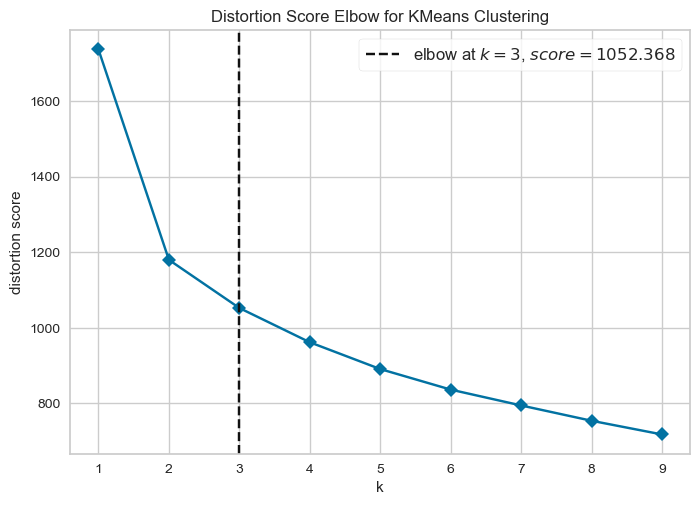

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(1,10),timings=False)
visualizer.fit(samples)        # Fit the data to the visualizer
visualizer.show()

In [10]:
!pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   ----- --------------------------------- 41.0/282.6 kB 245.8 kB/s eta 0:00:01
   ----------- --------------------------- 81.9/282.6 kB 508.4 kB/s eta 0:00:01
   ---------------- --------------------- 122.9/282.6 kB 554.9 kB/s eta 0:00:01
   -------------------- ----------------- 153.6/282.6 kB 573.4 kB/s eta 0:00:01
   ------------------------------- ------ 235.5/282.6 kB 722.1 kB/s eta 0:00:01
   ----------------------------------- -- 266.2/282.6 kB 713.1 kB/s eta 0:00:01
   -------------------------------------- 282.6/282.6 kB 696.6 kB/s eta 0:00:00


# Model or Algorithm

In [12]:
model2 = KMeans(n_clusters=3,max_iter=100,random_state=42)

In [13]:
trip_Final['Cluster_Made'] = model2.fit_predict(samples)
trip_Final.head()

,User_ID,Category_1,Category_2,Category_3,Category_4,Category_5,Category_6,Category_7,Category_8,Category_9,Category_10,Cluster_Made
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42,0
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32,0
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50,1
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86,1
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54,2


In [14]:
trip_Final.Cluster_Made = trip_Final.Cluster_Made.replace([0,1,2],['First Group','Second Group','Third Group'])
trip_Final.head()

,User_ID,Category_1,Category_2,Category_3,Category_4,Category_5,Category_6,Category_7,Category_8,Category_9,Category_10,Cluster_Made
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42,First Group
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32,First Group
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50,Second Group
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86,Second Group
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54,Third Group


### Final Cluster Centorids 

In [15]:
model2.cluster_centers_

array([[0.87695341, 1.38896057, 2.06910394, 0.56218638, 1.12293907,
        2.0753405 , 3.18903226, 2.79630824, 1.52584229, 2.59010753],
       [0.89440098, 1.25506112, 0.50234719, 0.45449878, 0.64767726,
        1.40102689, 3.17633252, 2.84364303, 1.57229829, 2.97850856],
       [0.90702055, 1.45452055, 0.72020548, 0.61339041, 1.17376712,
        2.23972603, 3.17965753, 2.86006849, 1.60708904, 2.74791096]])

In [16]:
trip_Final.Cluster_Made.value_counts(ascending=False)

Cluster_Made
Second Group    409
Third Group     292
First Group     279
Name: count, dtype: int64

# Business Submission

In [17]:
Submission = trip_Final.loc[:,['User_ID','Cluster_Made']]
Submission

,User_ID,Cluster_Made
0,User 1,First Group
1,User 2,First Group
2,User 3,Second Group
3,User 4,Second Group
4,User 5,Third Group
...,...,...
975,User 976,Second Group
976,User 977,Second Group
977,User 978,Third Group
978,User 979,Second Group


In [21]:
Submission.to_excel(r"C:\Users\naveen kumar pandey\Desktop\DATA ANALYTICS\PYTHON\Complete Machine Learning Project\K-Means_Output.xlsx")

# Finished